## Random Walk's Data Science Assessment
### G Praneeth Kumar - CS20B1130

In [91]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
# Load the dataset into a DataFrame
df = pd.read_csv('./books.csv')

##### How many rows and columns are there in books.csv dataset?

In [93]:
# Get the number of rows and columns
rows, columns = df.shape
print(f"Number of rows in the books.csv dataset: {rows}")
print(f"Number of columns in the books.csv dataset: {columns}")

Number of rows in the books.csv dataset: 399
Number of columns in the books.csv dataset: 24


##### How many books do not have an original title?

In [94]:
# Count the number of books without an original title
books_without_original_title = df[df['original_title'].isnull()]

# Get the count
num_books_without_original_title = len(books_without_original_title)
print(f'Number of books without an original title: {num_books_without_original_title}')

Number of books without an original title: 36


##### How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [95]:
# Remove rows with null values in the 'OriginalTitle' column
df = df.dropna(subset=['original_title'])

# Get the number of unique books based on 'book_id'
count_unique_books = df['book_id'].nunique()
print(f'Number of unique books after removing null values in original_title column: {count_unique_books}')

Number of unique books after removing null values in original_title column: 363


##### What is the average rating of all the books in the dataset based on ‘average_rating’?

In [96]:
# Calculate the average rating
average_rating = df['average_rating'].mean()
print(f'Average rating of all books in the dataset: {average_rating:.2f}')

Average rating of all books in the dataset: 3.99


##### Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’

In [97]:
# Filter rows where 'original_publication_year' is equal to 2000
books_published = df[df['original_publication_year'] == 2000]

# Get the count
count_books_published = books_published.shape[0]
print(f'Number of books published in the year 2000 based on the original_publication_year: {count_books_published}')

Number of books published in the year 2000 based on the original_publication_year: 7


##### Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [98]:
# Find the row with the maximum 'work_ratings_count'
max_rating = df[df['work_ratings_count'] == df['work_ratings_count'].max()]

# Get the title
book_title = max_rating['title'].values[0]
print(f'The book with the maximum number of ratings is: {book_title}')

The book with the maximum number of ratings is: The Diary of a Young Girl


##### Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

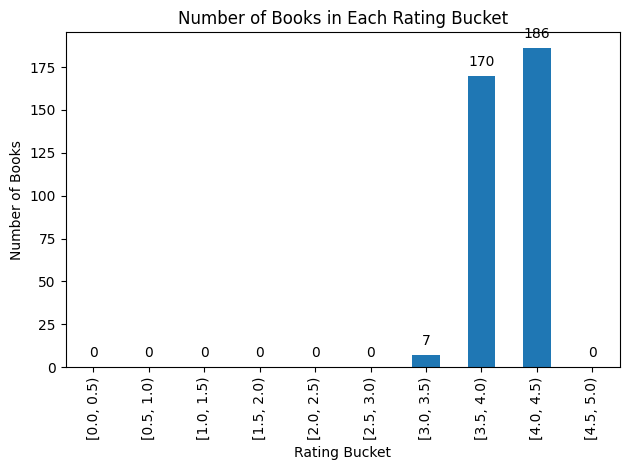

In [99]:
# Create bins for average ratings
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Bucket the average_rating into the specified bins
df['rating_bucket'] = pd.cut(df['average_rating'], bins, right=False)

# Group by rating buckets and count the number of books in each bucket
rating_counts = df['rating_bucket'].value_counts().sort_index()

# Plot the bar graph
ax = rating_counts.plot(kind='bar')

# Annotate each bar with its frequency
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')

# Adjust layout for better appearance
plt.tight_layout()  
plt.show()